In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from src.utils import visualize_metrics

In [2]:
# Reading the data
data = pd.read_csv('data/crops.csv', sep=',')
features = data[data.columns[:-1]]
labels = data[data.columns[-1]]

#Stratified splitting for train and test
#Stratified means that it maintains similar distributions of classes for both train and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels)

#Oversampling
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [3]:
#Training both balanced and unbalanced datasets with a stratifying random forest
clf_unbalanced = RandomForestClassifier(
    max_depth=5, random_state=0, n_estimators=100);
clf_unbalanced.fit(X_train, y_train);

clf_semibalanced = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=5, random_state=0, n_estimators=100);
clf_semibalanced.fit(X_train, y_train);

clf_balanced = RandomForestClassifier(
    max_depth=5, random_state=0, n_estimators=100);
clf_balanced.fit(X_res, y_res);

Unbalanced dataset
Accuracy: 0.7978142076502732 
Precision: 0.5294745484400657 
Recall: 0.4018394648829432 
F1 Score: 0.4154293381037567


c:\Users\vismi\Documents\University\7th Semester\Semester Project\ce7_741_HOI_detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


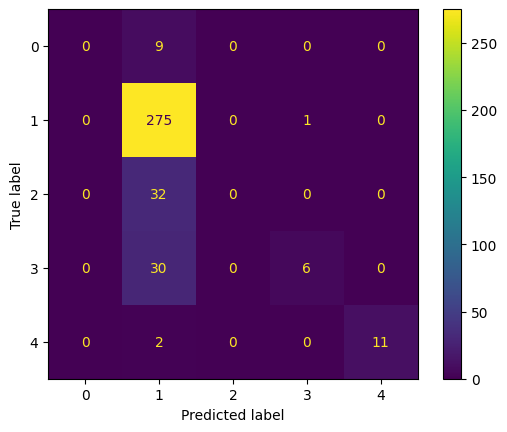

Semi-balanced dataset
Accuracy: 0.5245901639344263 
Precision: 0.489829871664978 
Recall: 0.7185688405797102 
F1 Score: 0.5162421346211621


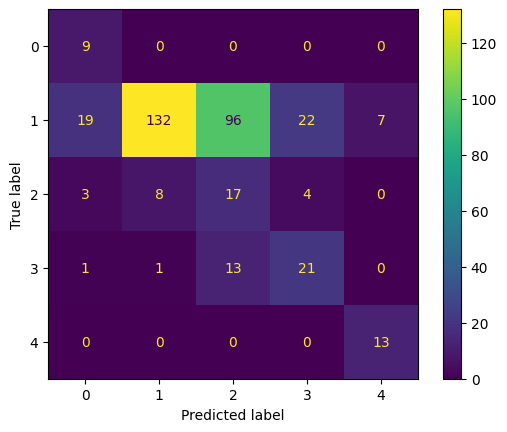

Balanced Dataset
Accuracy: 0.680327868852459 
Precision: 0.6629261754740466 
Recall: 0.7764492753623189 
F1 Score: 0.6608067559586374


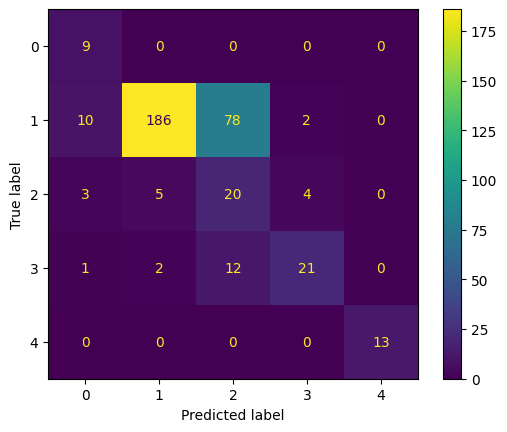

In [5]:
print('Unbalanced dataset')
visualize_metrics(clf_unbalanced, X_test, y_test)

print('Semi-balanced dataset')
visualize_metrics(clf_semibalanced, X_test, y_test)

print('Balanced Dataset')
visualize_metrics(clf_balanced, X_test, y_test)